# Multinomial Logistic Regression

In this script we use multinomial logistic regression to predict the handwritten digits of the MNIST dataset.

sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
1.2.1
(4000, 1, 28, 28) (4000,) 28


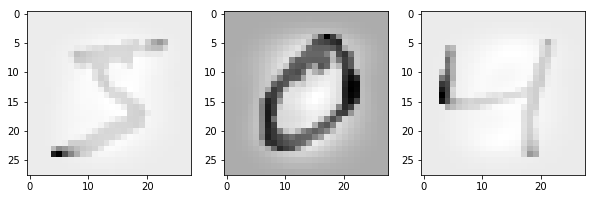

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

# To be compatible with python3
try:
    import cPickle as pickle
except ImportError:
    import pickle

import gzip
import time
import tensorflow as tf
import sys

print(sys.version_info)
print(tf.__version__)

with gzip.open('./mnist_4000.pkl.gz', 'rb') as f:
    (X,y) = pickle.load(f, encoding='latin1')
PIXELS = len(X[0,0,0,:])
print(X.shape, y.shape, PIXELS) #As read
fig = plt.figure(figsize=(10,30))
for i in range(3):
    a=fig.add_subplot(1,3,(i+1))
    plt.imshow(-X[i,0,:,:], interpolation='none',cmap=plt.get_cmap('gray'))

In [3]:
# We need to reshape for the logistic regression
X = X.reshape([4000, 784])
np.shape(X)

(4000, 784)

In [4]:
# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='float32')
    result[np.arange(len(vector)), vector] = 1
    return result
print("class label")
print(y[0:5])
print("class label in OneHot encodig")
print(convertToOneHot(y[0:5], 10))

class label
[5 0 4 1 9]
class label in OneHot encodig
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Construction of the graph

In [7]:
tf.reset_default_graph()
tf.set_random_seed(1)
#Note that we usually do not like to specify the batchsize. Choosing it `None` will leave it open
x = tf.placeholder(tf.float32, shape=[None, 784], name='x_data')
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_data')

# We start with random weights a
w = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))

#<-------------------------- Your code here ---------------
# Your code here, do a matrix multiplication between x,w and an addtion of b
z = tf.matmul(x, w)+ b
# End of your code

prob = tf.nn.softmax(z)
init_op = tf.global_variables_initializer() 

### Store the graph and visualize it in tensorboard

In [8]:
tf.summary.FileWriter("/tmp/dumm/mlp_tensorflow_solution/", tf.get_default_graph()).close() #<--- Where to store

### Doing a forward pass of the untrained network

In [9]:
with tf.Session() as sess:
    sess.run(init_op)
    res_val = sess.run(prob, feed_dict={x:X[0:10]})
print("true label = ",y[0])
print()
print("probability for each class = ",res_val[0])
print()
print("pred label = ",np.argmax(res_val[0]))

true label =  5

probability for each class =  [0.11525529 0.13671385 0.08958027 0.07389172 0.11342652 0.10523579
 0.10331967 0.07971239 0.07903792 0.1038266 ]

pred label =  1


### Train the model

In [14]:
loss = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(prob), reduction_indices=[1]))

#train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
train_op = tf.train.AdagradOptimizer(0.1).minimize(loss)
init_op = tf.global_variables_initializer() 
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(1000):
        idx = np.random.permutation(2400)[0:128] #Easy minibatch of size 128
        #res, out_val, _ = sess.run((loss, prob, train_op),feed_dict={x:X[idx], y_true:convertToOneHot(y[idx], 10)})
        loss_, out_val, _ = sess.run((loss, prob, train_op),feed_dict={x:X[idx], y_true:convertToOneHot(y[idx], 10)})
        if (i % 100 == 0):
            print(loss_)
    
    # Get the loss for the validation results (from 2400:3000)
    print('Loss for the validation set')
    #<-------------------------- Your code here ---------------
    loss_val = sess.run((loss), feed_dict={x: X[2400:3000]}, y_true: convertToOneHot(y[240]))#get loss here
    print(loss_val)
    # Get the results for the validation set
    res_val = sess.run((prob), feed_dict={x: X[2400:3000]})#get probs here
    #<-------------------------  End of your code here --------

2.3213174
0.23544332
0.08242616
0.059913512
0.057606068
0.039743934
0.051407035
0.03307412
0.053724244
0.032502625
Loss for the validation set


InvalidArgumentError: Shape [-1,10] has negative dimensions
	 [[Node: y_data = Placeholder[dtype=DT_FLOAT, shape=[?,10], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'y_data', defined at:
  File "C:\Users\Daniel\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Daniel\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f645ec3c20e9>", line 5, in <module>
    y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_data')
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Daniel\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,10] has negative dimensions
	 [[Node: y_data = Placeholder[dtype=DT_FLOAT, shape=[?,10], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
# and estimate the preformance on the validation set
# Your code here
print("Accuracy =",np.mean(np.argmax(res_val, axis = 1) == y[2400:3000]))
import random 
rmd=random.randint(2400,3000)
print("probs =",np.round(res_val[rmd-2400],2))
print("predicted label =",np.argmax(res_val[rmd-2400]))
print("true label =",np.round(y[rmd],2))